In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

In [ ]:
# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
# Load FashionMNIST dataset
#transform = transforms.Compose([transforms.ToTensor()])
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor()])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 11359476.78it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 194561.00it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1246570.33it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6033047.50it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# Define the small Inception model based on Figure 3 of the referenced paper
class SmallInception(nn.Module):
    def __init__(self):
        super(SmallInception, self).__init__()
        # Example architecture with two convolutional layers and a fully connected layer
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # Input: 1 channel (grayscale), Output: 16 channels
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # Output: 32 channels
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer
        # Calculate the output size after conv layers and pooling
        self.fc_input_size = 32 * 14 * 14  # Adjusted based on the output size after pooling
        self.fc = nn.Linear(self.fc_input_size, 10)  # Fully connected layer to 10 classes (FashionMNIST)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = self.pool(x)  # Apply max pooling
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc(x)  # Fully connected layer
        return x


In [ ]:
model = SmallInception()
#criterion = nn.CrossEntropyLoss()

In [ ]:
# Check if the model has parameters
print("Model Parameters:", list(model.parameters()))  # Ensure it is not empty


Model Parameters: [Parameter containing:
tensor([[[[-2.1489e-02,  1.9160e-01, -2.3786e-01],
          [ 4.7694e-02, -2.9800e-01, -7.8256e-02],
          [-8.8548e-02,  1.3612e-01,  6.3942e-03]]],


        [[[ 2.4020e-01,  2.8770e-01,  1.1514e-01],
          [-1.9013e-01, -3.2899e-03, -1.4221e-02],
          [ 1.1687e-02, -1.2341e-02,  1.8788e-01]]],


        [[[-6.0001e-02, -3.7787e-02,  2.9823e-01],
          [ 2.4384e-01, -3.1993e-01, -1.8944e-01],
          [-3.2494e-01, -8.9176e-02, -1.9162e-01]]],


        [[[ 2.5288e-01, -2.9733e-01, -1.2716e-01],
          [ 2.2620e-01,  3.1428e-01, -2.4962e-01],
          [-2.0806e-01,  1.6723e-01,  2.3197e-01]]],


        [[[-1.8667e-01, -2.4663e-01,  1.8410e-01],
          [-1.5951e-01,  2.3665e-01, -1.8540e-02],
          [ 2.4996e-01,  1.2091e-01,  2.7875e-01]]],


        [[[ 1.7236e-01, -2.2077e-01, -2.5155e-01],
          [ 5.6426e-05, -3.0577e-01, -1.5181e-01],
          [ 8.4594e-02,  1.8688e-01, -7.6927e-02]]],


        [[[ 9.219

In [ ]:
# Part 1: Candidate Learning Rates and Training Loss Plot
learning_rates = [10**i for i in range(-9, 2)]  # 10^-9 to 10^1
train_losses = []
train_accuracies = []


In [ ]:
for lr in learning_rates:
    print ("**lr=",lr)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    epoch_losses = []
    epoch_accuracies = []


    for epoch in range(5):  # Train for 5 epochs
        print("**epoch=",epoch)
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_losses.append(total_loss / len(train_loader))
        epoch_accuracies.append(correct / total)  # Calculate accuracy

    train_losses.append(epoch_losses)
    train_accuracies.append(epoch_accuracies)


**lr= 1e-09
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 1e-08
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 1e-07
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 1e-06
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 1e-05
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 0.0001
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 0.001
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 0.01
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 0.1
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 1
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**lr= 10
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4


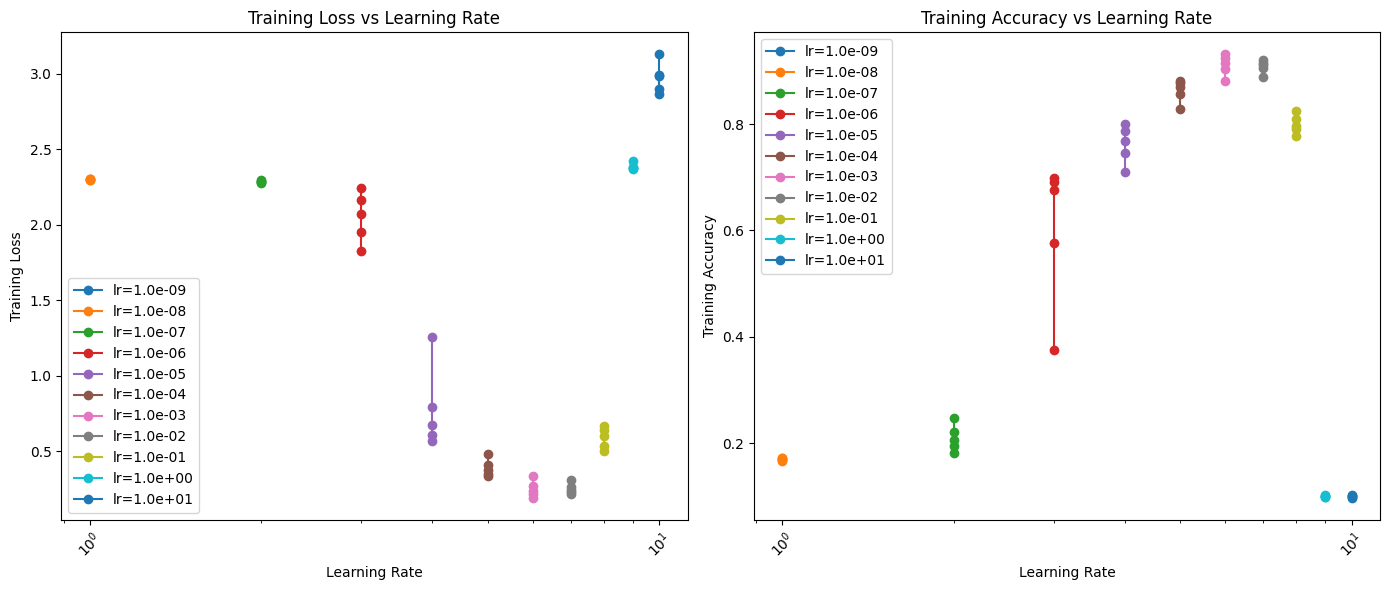

In [ ]:
# Plotting the training loss vs learning rate
plt.figure(figsize=(14, 6))

# Plot training loss
plt.subplot(1, 2, 1)
for i, losses in enumerate(train_losses):
    plt.plot([i]*5, losses, marker='o', label=f'lr={learning_rates[i]:.1e}')
plt.xticks(ticks=range(len(learning_rates)), labels=[f'{lr:.1e}' for lr in learning_rates], rotation=45)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Learning Rate')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
for i, accuracies in enumerate(train_accuracies):
    plt.plot([i]*5, accuracies, marker='o', label=f'lr={learning_rates[i]:.1e}')
plt.xticks(ticks=range(len(learning_rates)), labels=[f'{lr:.1e}' for lr in learning_rates], rotation=45)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Learning Rate')
plt.legend()

plt.tight_layout()
plt.show()


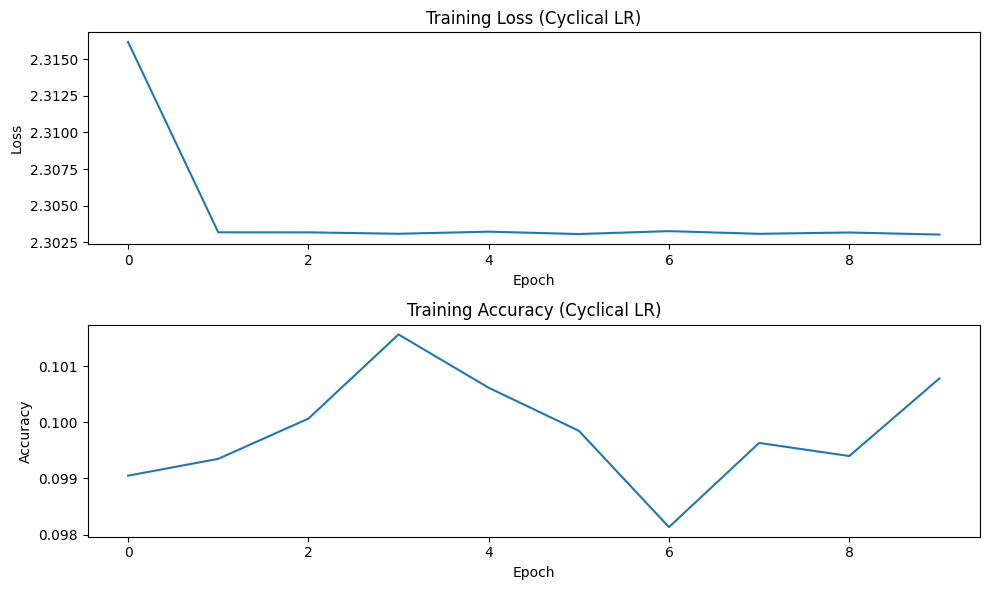

In [ ]:
# Part 2: Cyclical Learning Rate Policy
# Assume lrmin and lrmax are identified from the previous plot
lrmin = 1e-6  # Example value, modify based on the plot
lrmax = 1e-2  # Example value, modify based on the plot

def cyclical_lr_training(model, train_loader, lrmin, lrmax, epochs):
    optimizer = optim.Adam(model.parameters(), lr=lrmin)
    scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=lrmin, max_lr=lrmax, step_size_up=5, mode='exp_range')

    train_losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

        train_losses.append(total_loss / len(train_loader))
        accuracies.append(correct / len(train_loader.dataset))

    # Plotting training loss and accuracy
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.title('Training Loss (Cyclical LR)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(accuracies, label='Accuracy')
    plt.title('Training Accuracy (Cyclical LR)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

cyclical_lr_training(model, train_loader, lrmin, lrmax, epochs=10)


**batch_size= 32
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**batch_size= 64
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**batch_size= 128
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**batch_size= 256
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4


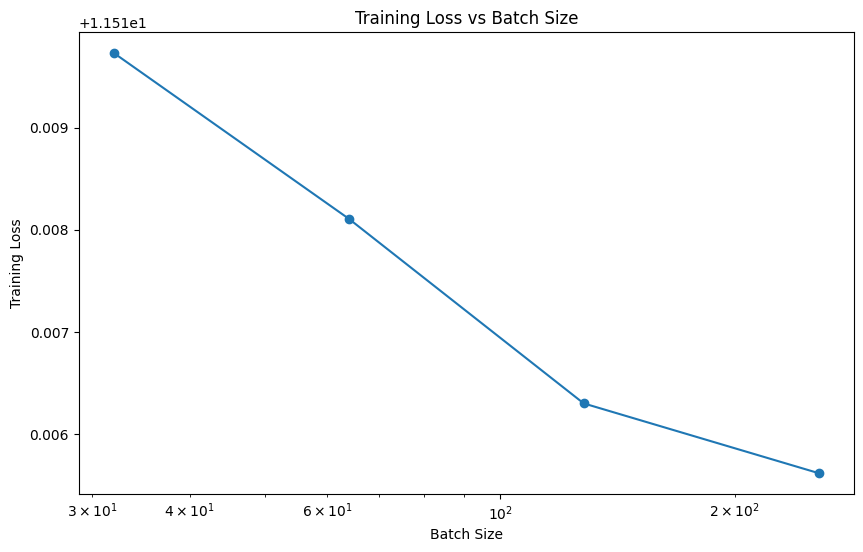

In [ ]:
# Part 3: Batch Size Experimentation
fixed_lr = lrmax  # Fix learning rate to lrmax
batch_sizes = [32 * (2 ** i) for i in range(4)]  # 32, 64, ..., 8192
losses = []

for batch_size in batch_sizes:
    print("**batch_size=",batch_size)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=fixed_lr)

    total_loss = 0
    for epoch in range(5):  # Train for 5 epochs
        print("**epoch=",epoch)
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

    losses.append(total_loss / len(train_loader))

# Plotting the training loss against batch sizes
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, losses, marker='o')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Batch Size')
plt.show()

In [ ]:
# Part 3: Batch Size Experimentation : Run 2
fixed_lr = lrmax  # Fix learning rate to lrmax
batch_sizes = [32 * (2 ** i) for i in range(6)]  # 32, 64, ..., 8192
losses = []

for batch_size in batch_sizes:
    print("**batch_size=",batch_size)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=fixed_lr)

    total_loss = 0
    for epoch in range(5):  # Train for 5 epochs
        print("**epoch=",epoch)
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = nn.CrossEntropyLoss()(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

    losses.append(total_loss / len(train_loader))

# Plotting the training loss against batch sizes
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, losses, marker='o')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Batch Size')
plt.show()

**batch_size= 32
**epoch= 0
**epoch= 1
**epoch= 2
**epoch= 3
**epoch= 4
**batch_size= 64
**epoch= 0
